<a href="https://colab.research.google.com/github/ardex8752022/Distribution-of-goods-receipts-between-stores/blob/main/OD_1_Project_1_Otchesova_Alla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# САМОСТОЯТЕЛЬНАЯ РАБОТА

## Определяем количество ботов на сайте

## Задачи:

1.Оценить количество ботов, которые заходят на наш сайт, и их долю от всего трафика.  
2.Определить, с каких источников и в какое время суток чаще всего заходят роботы.

Создаем словарь params,  период анализа: с 1 сентября 2020 года по 30 сентября 2020 года, используем семплирование.

In [ ]:
params = {'metrics': 'ym:s:visits,ym:s:robotPercentage',
          'dimensions': 'ym:s:lastsignTrafficSource,ym:s:hour',
          'date1': '2020-09-01',
          'date2': '2020-09-30',
          'ids': 30177909,
          'accuracy':'full',
          'limit':100000}

Задаем токен, создадем словарь headers, который будет содержать параметры заголовков HTTP

In [ ]:
token = 'AQAAAAAHAHacAAdtgnqFPfiNIk_FswMq-l8xpq8'
headers = {'Authorization': 'OAuth ' + token}

Импортируем необходимые библиотеки:

In [ ]:
import json
import requests
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Делаем запрос

In [ ]:
response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
print (response.status_code)

200


Создаем переменную bots_data

In [ ]:
bots_data = response.json()

Посмотрим, какого типа данные хранятся в объекте metrika_data:

In [ ]:
print(type(bots_data))

<class 'dict'>


Проверяем список ключей

In [ ]:
print(bots_data.keys())

dict_keys(['query', 'data', 'total_rows', 'total_rows_rounded', 'sampled', 'contains_sensitive_data', 'sample_share', 'sample_size', 'sample_space', 'data_lag', 'totals', 'min', 'max'])


Проверяем количество строк в словаре

In [ ]:
bots_data['total_rows']

107

Cмотрим на данные статистики. Для этого с помощью pprint выведем значение по ключу data в словаре bots_data:

In [ ]:
pprint(bots_data['data'][0:5])

[{'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
                  'name': 'Search engine traffic'},
                 {'id': '16', 'name': '16:00'}],
  'metrics': [251.0, 24.70119522]},
 {'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
                  'name': 'Search engine traffic'},
                 {'id': '15', 'name': '15:00'}],
  'metrics': [240.0, 26.25]},
 {'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
                  'name': 'Search engine traffic'},
                 {'id': '11', 'name': '11:00'}],
  'metrics': [228.0, 25.87719298]},
 {'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
                  'name': 'Search engine traffic'},
                 {'id': '13', 'name': '13:00'}],
  'metrics': [227.0, 2

Cоздадем датафрейм metrika_df из данных статистики metrika_data['data']:

In [ ]:
bots_df = pd.DataFrame(bots_data['data'])
display(bots_df.head(10))

,dimensions,metrics
0,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[251.0, 24.70119522]"
1,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[240.0, 26.25]"
2,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[228.0, 25.87719298]"
3,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[227.0, 28.1938326]"
4,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[225.0, 24.88888889]"
5,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[225.0, 25.77777778]"
6,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[209.0, 26.31578947]"
7,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[186.0, 19.35483871]"
8,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[166.0, 17.46987952]"
9,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[161.0, 23.60248447]"



Избавляемся от вложенных словарей, преобразуем данные в плоский вид

In [ ]:
def bots_metrics(bots_data):
    list_of_dicts = []
    dimensions_list = bots_data['query']['dimensions']
    metrics_list = bots_data['query']['metrics']
    for data_item in bots_data['data']:
        d = {}
        for i,dimension in enumerate(data_item['dimensions']):
            d[dimensions_list[i]] = dimension['name']
        for i,metric in enumerate(data_item['metrics']):
            d[metrics_list[i]] = metric
        list_of_dicts.append(d)
    return list_of_dicts

Преобразуем данные с помощью функции bots_metrics и записываем в переменную bots_list_of_dicts, которая представляет собой обычный список словарей без вложенных объектов:

In [ ]:
bots_list_of_dicts = bots_metrics(bots_data)
pprint(bots_list_of_dicts[0:5])

[{'ym:s:hour': '16:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 24.70119522,
  'ym:s:visits': 251.0},
 {'ym:s:hour': '15:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 26.25,
  'ym:s:visits': 240.0},
 {'ym:s:hour': '11:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 25.87719298,
  'ym:s:visits': 228.0},
 {'ym:s:hour': '13:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 28.1938326,
  'ym:s:visits': 227.0},
 {'ym:s:hour': '12:00',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:robotPercentage': 24.88888889,
  'ym:s:visits': 225.0}]


Создаем датафрейм bots_df

In [ ]:
bots_df = pd.DataFrame(bots_list_of_dicts)
display(bots_df.head(10))

,ym:s:lastsignTrafficSource,ym:s:hour,ym:s:visits,ym:s:robotPercentage
0,Search engine traffic,16:00,251.0,24.701195
1,Search engine traffic,15:00,240.0,26.250000
2,Search engine traffic,11:00,228.0,25.877193
3,Search engine traffic,13:00,227.0,28.193833
4,Search engine traffic,12:00,225.0,24.888889
5,Search engine traffic,14:00,225.0,25.777778
6,Search engine traffic,17:00,209.0,26.315789
7,Search engine traffic,10:00,186.0,19.354839
8,Search engine traffic,21:00,166.0,17.469880
9,Search engine traffic,19:00,161.0,23.602484


Для удобства переименуем столбцы и добавим новый столбец, в котором расчитаем количество посещений ботов:

In [ ]:
bots_df.columns=['Source', 'Time','Total_visits','Bots_share']
bots_df['Bots_visits'] = bots_df['Total_visits']*bots_df['Bots_share']/100
display(bots_df.head(10))

,Source,Time,Total_visits,Bots_share,Bots_visits
0,Search engine traffic,16:00,251.0,24.701195,62.0
1,Search engine traffic,15:00,240.0,26.250000,63.0
2,Search engine traffic,11:00,228.0,25.877193,59.0
3,Search engine traffic,13:00,227.0,28.193833,64.0
4,Search engine traffic,12:00,225.0,24.888889,56.0
5,Search engine traffic,14:00,225.0,25.777778,58.0
6,Search engine traffic,17:00,209.0,26.315789,55.0
7,Search engine traffic,10:00,186.0,19.354839,36.0
8,Search engine traffic,21:00,166.0,17.469880,29.0
9,Search engine traffic,19:00,161.0,23.602484,38.0


Группируем данные общих посещений и посещений ботов на основе источника привлечения:

In [ ]:
visit_pivot = bots_df.groupby(['Source'])[['Total_visits','Bots_visits']].sum().sort_values(['Total_visits'],ascending=False)
display(visit_pivot)

,Total_visits,Bots_visits
Source,,
Search engine traffic,3334.0,739.0
Direct traffic,757.0,177.0
Link traffic,126.0,31.0
Social network traffic,80.0,11.0
Internal traffic,10.0,3.0
Cached page traffic,6.0,1.0
Recommendation system traffic,2.0,0.0


Добавляем столбец с расчетом доли посещений ботов от общего количества посещений

In [ ]:
visit_pivot.columns=['Total_visits','Bots_visits']
visit_pivot['Bots_share'] = visit_pivot['Bots_visits']/visit_pivot['Total_visits']*100
display(visit_pivot)

,Total_visits,Bots_visits,Bots_share
Source,,,
Search engine traffic,3334.0,739.0,22.165567
Direct traffic,757.0,177.0,23.381770
Link traffic,126.0,31.0,24.603175
Social network traffic,80.0,11.0,13.750000
Internal traffic,10.0,3.0,30.000000
Cached page traffic,6.0,1.0,16.666667
Recommendation system traffic,2.0,0.0,0.000000


In [ ]:
share_of_bots = visit_pivot.Bots_visits.sum()/visit_pivot.Total_visits.sum()
print ('Доля ботов от всего трафика: {:.2%}'.format(share_of_bots))

Доля ботов от всего трафика: 22.29%


Создаем сводную таблица для выявления времени суток, в которое чаще всего заходят боты:

In [ ]:
bots_pivot = bots_df.loc[bots_df['Source'].isin(['Search engine traffic','Direct traffic','Link traffic', 'Social network traffic','Internal traffic','Cached page traffic', 'Recommendation system traffic' ])].pivot_table(values=['Bots_visits'],
    index=['Time'],
    columns=['Source'],
    aggfunc='sum',
    fill_value = 0)
    #margins=True,
    #margins_name='Total')
display(bots_pivot)

Bots_visits  ...                       
Source Cached page traffic  ... Social network traffic
Time                        ...                       
00:00                    0  ...                      0
01:00                    1  ...                      0
02:00                    0  ...                      0
03:00                    0  ...                      0
04:00                    0  ...                      0
05:00                    0  ...                      0
06:00                    0  ...                      0
07:00                    0  ...                      0
08:00                    0  ...                      1
09:00                    0  ...                      1
10:00                    0  ...                      0
11:00                    0  ...                      0
12:00                    0  ...                      1
13:00                    0  ...                      2
14:00                    0  ...                      0
15:00                    0  ...                      1
16:00                    0  ...                      1
17:00                    0  ...                      0
18:00                    0  ...                      0
19:00                    0  ...                      0
20:00                    0  ...                      0
21:00                    0  ...                      1
22:00                    0  ...                      3
23:00                    0  ...                      0

[24 rows x 7 columns]

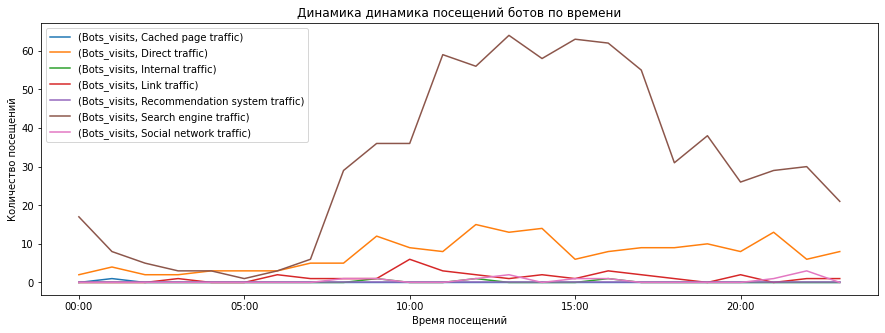

In [ ]:

bots_pivot.plot(title='Динамика динамика посещений ботов по времени',

                             xlabel='Время посещений',
                             ylabel='Количество посещений',
                             figsize=(15, 5));
plt.legend(loc='upper left');


# Вывод:
    
1. Всего за исследуемый период на сайт зашло **962 бота**, что составляет **22,29%** от общего трафика.


2. Больше всего ботов заходиа с **Search engine traffic** (739 заходов), **Direct traffic**(177 заходов) и **Link traffic** (31 заход).
   По времени посещений - больше всего заходов в рабочее время *с 9.00 до 17.00* (более 50 заходов за час)